In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [15]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15

xp=np.arange(-44,60)
DDf = lambda x:2*np.ones_like(x)

In [16]:
def draw_plots(Xp,f,df,ddf):
    yp=f(Xp)
    df_y=df(Xp)
    ddf_y=ddf(Xp)

    #fx
    plt.plot(Xp,yp)
    plt.title("f(x)=x^2-15x+1")
    plt.grid()
    plt.show()

    #df
    plt.plot(Xp,df_y)
    plt.title("Df(x)=2^x-15")
    plt.grid()
    plt.show()

    #ddf
    plt.plot(Xp,ddf_y)
    plt.title("DDf(x)=2")
    plt.grid()
    plt.show()


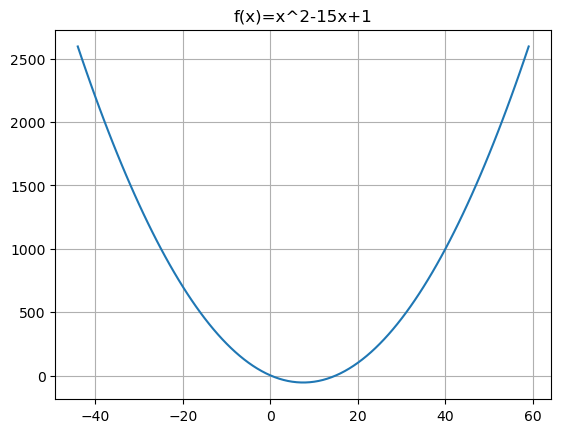

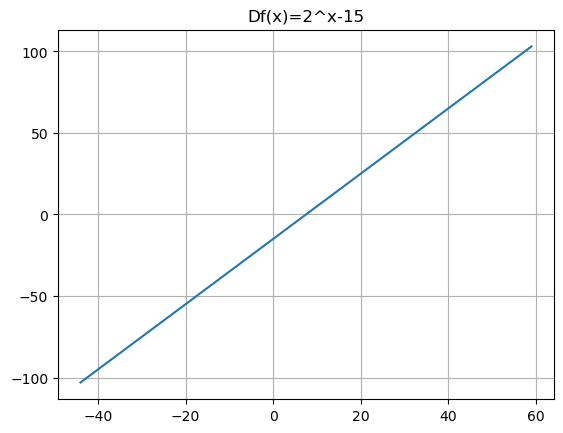

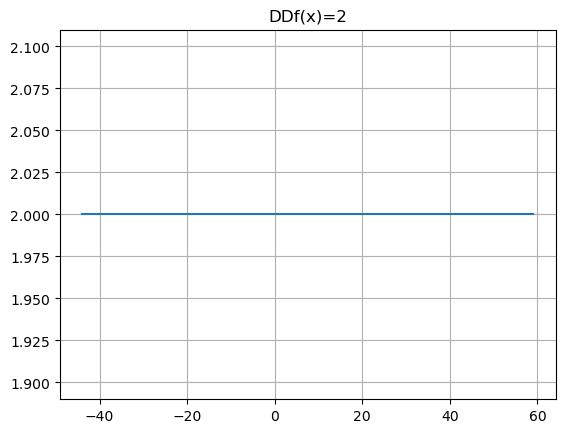

In [17]:
draw_plots(xp,f,Df,DDf)

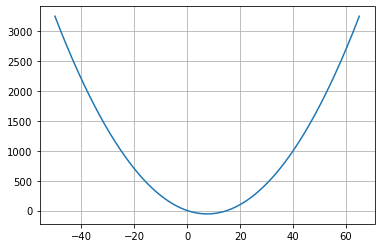

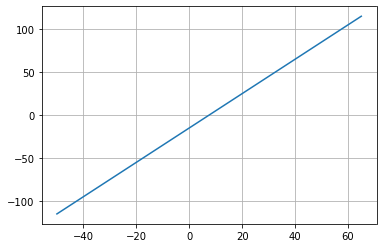

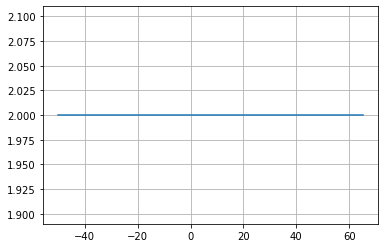

In [21]:
def gradient_descent_first_drevi(x ,alpha ,epsilon ,df=Df):
    print(f"GD Results with x0 ={x}, lr={alpha}, epsilon={epsilon}")
    iteration =0
    gd = 1
    #gd_norm=np.linalg.norm(gd)
    while gd>epsilon:
        gd = df(x)
        x = x - (alpha * gd)
        x_min = x
        iteration += 1

    print(f"Found solution after {iteration} iterations.\n")
    print(f"x_min = {x_min}")
    print(f"Gradient = {gd}")
    return gd,x_min  

In [22]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
g1,x1=gradient_descent_first_drevi(40,0.01,0.1)

GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 322 iterations.

x_min = 7.548604864188269
Gradient = 0.09919360038422198


In [30]:
# Newton's method without learning rate
def newton_iter(x  ,epsilon ,alpha=1,df=Df,ddf=DDf):
    print(f"Newton Results with x0 ={x}, epsilon={epsilon}")
    iteration =0
    gd = df(x)/ddf(x)
    gd_norm=np.linalg.norm(gd)
    while gd_norm> epsilon:
        x = x -  alpha*gd
        x_min = x

        iteration += 1
        gd=df(x)/ddf(x)
        gd_norm=np.linalg.norm(gd)

    print(f"Found solution after {iteration} iterations.\n")
    print(f"x_min = {x_min}")
    print(f"Gradient = {gd_norm}")
    return gd,x_min

In [31]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
g2,x_min=newton_iter(40, 0.1)

Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.

x_min = 7.5
Gradient = 0.0


In [32]:
g3,x_min=newton_iter(40,0.1,0.8)

Newton Results with x0 =40, epsilon=0.1
Found solution after 4 iterations.

x_min = 7.552
Gradient = 0.0519999999999996


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [33]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

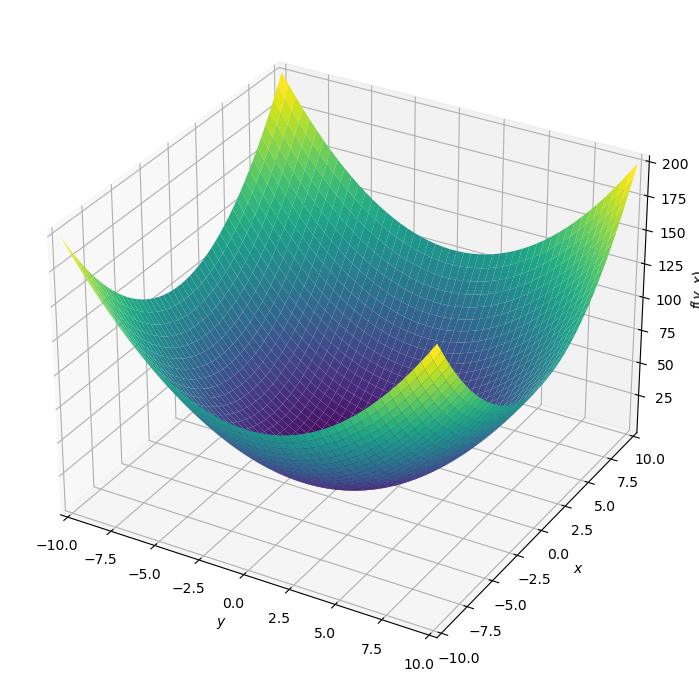

In [34]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

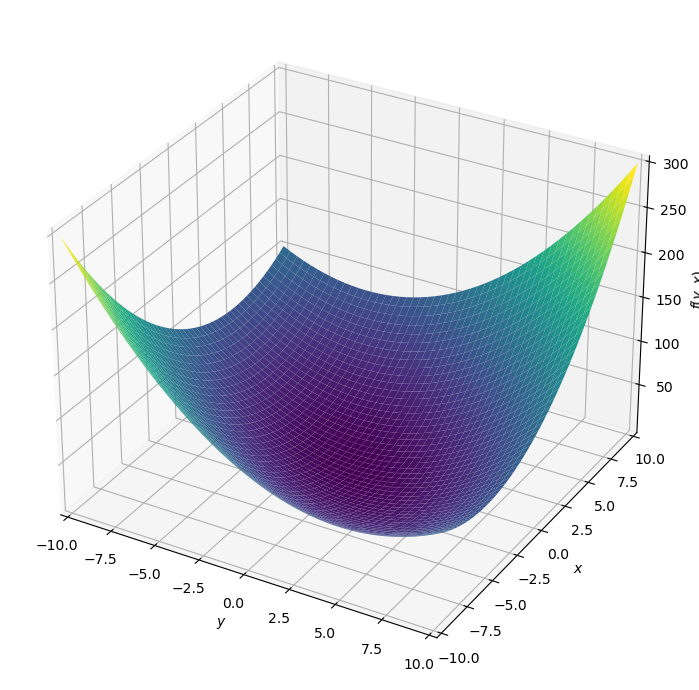

In [35]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

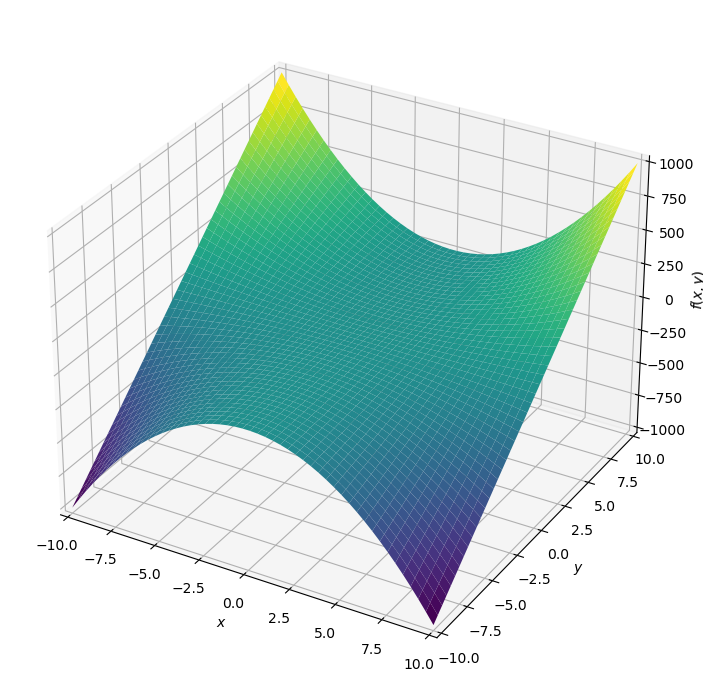

In [36]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [37]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [38]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [40]:
f_3 = lambda x: x**2 * y
Df_3 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_3 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [50]:
def multi_variable_gd(x,alpha=1,epsilon=0.001,df=Df_1):
    iteration =0
    gd=df(x)
    x = x - alpha*gd
    gd_norm=np.linalg.norm(gd)
    while gd_norm > epsilon:
        gd = df(x)
        xmin=x
        x = x - alpha * gd
        gd_norm=np.linalg.norm(gd)
        iteration += 1
 
    print(f"Found solution after {iteration} iterations.\n")
    print(f"xy_min = {xmin}")
    print(f"Gradient = {gd}")
    return gd,xmin


In [51]:
# First function
x=[10,10]
multi_variable_gd(x,0.1,0.001)

Found solution after 46 iterations.

xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


(array([0.0006969, 0.0006969]), array([0.00034845, 0.00034845]))

In [52]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
multi_variable_gd(x,0.5,0.001)

Found solution after 1 iterations.

xy_min = [0. 0.]
Gradient = [0. 0.]


(array([0., 0.]), array([0., 0.]))

In [75]:
# hessian= np.linalg.inv(ddf(x))
# x = x - alpha * (hessian @ gd)
def multi_var_newton(x  ,epsilon ,alpha=1,df=Df_1,ddf=DDf_1):
    iteration =0
    gd=df(x)
    gd_norm=np.linalg.norm(gd)
    while gd_norm>epsilon:
        gd = df(x)
        hessian= np.linalg.inv(ddf(x))
        x = x - alpha * np.dot(hessian,gd).T
        x_min = x
        iteration += 1
        gd = df(x)
        gd_norm=np.linalg.norm(gd)


    print(f"Found solution after {iteration} iterations.\n")
    print(f"xy_min = {x_min}")
    print(f"Gradient = {gd}")
    return gd,x_min

In [82]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
multi_var_newton(x,0.001)

Found solution after 1 iterations.

xy_min = [0. 0.]
Gradient = [0. 0.]


(array([0., 0.]), array([0., 0.]))

In [83]:
multi_var_newton(x,0.001,0.5)

Found solution after 15 iterations.

xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


(array([0.00061035, 0.00061035]), array([0.00030518, 0.00030518]))

In [84]:
multi_variable_gd(x,0.5,0.001, Df_2)

Found solution after 16 iterations.

xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


(array([0.00045776, 0.00045776]), array([0.00015259, 0.00015259]))

In [85]:
multi_var_newton(x,0.001,1,Df_2,DDf_2)

Found solution after 1 iterations.

xy_min = [0. 0.]
Gradient = [0. 0.]


(array([0., 0.]), array([0., 0.]))

In [86]:
multi_var_newton(x,0.001,0.9,Df_2,DDf_2)

Found solution after 5 iterations.

xy_min = [1.e-04 1.e-04]
Gradient = [0.0003 0.0003]


(array([0.0003, 0.0003]), array([1.e-04, 1.e-04]))

In [87]:
multi_variable_gd(x,0.01,0.001,Df_3)

Found solution after 79 iterations.

xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


(array([9.32503127e-04, 4.63214210e-09]),
 array([6.80598421e-05, 6.85061189e+00]))

In [89]:
multi_var_newton(x,0.001,1,Df_3,DDf_3)

Found solution after 9 iterations.

xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


(array([0.00076294, 0.00038147]), array([0.01953125, 0.01953125]))

## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [102]:
def multi_var_BFGS(x0, xk_1, epsilon, alpha=1,df=Df_1):

    # initialize b_1
    b_1 = np.eye(len(x0))

    # calculatefirst dervative
    x0=np.asarray(x0).reshape(2,-1)
    xk_1=np.array(xk_1).reshape(2,-1)
    gd = df(x0)
    gd_1=df(xk_1)

    gd_norm = np.linalg.norm(gd)

    d_x = np.asarray(x0) - np.asarray(xk_1).reshape(2, -1)
    y_t = df(x0) - df(xk_1).reshape(2, -1)

    # y_t = np.asarray(y_t)

    iteration = 0
    i=np.eye(len(x0))

    print("*******")
    print(f"xn_1:\n {xk_1}")
    print(f"xn:\n {x0}")
    print(f"dfxn_1:\n {gd_1}")
    print(f"dfxn:\n {gd}")
    print("norm", gd_norm)
    print("*************")

    while gd_norm > epsilon:
        gd = df(x0).reshape(2,-1)
        gd_1=df(xk_1).reshape(2,-1)
        b_1 = ( i - ( (d_x @ y_t.T)/(y_t.T@d_x) ) )@ b_1 @( i - ( (y_t @d_x.T)/(y_t.T@d_x) ))+((d_x @ d_x.T)/(y_t.T@d_x))
        print(f"B inverse : \n{b_1}")

        xk_1 = x0
        x0 = x0 - alpha*(np.dot(b_1 , gd))

        x_min = x0
        d_x = x0 - xk_1
        y_t = df(x0) - df(xk_1)
        y_t = np.asarray(y_t)
        iteration += 1
        gd = df(x0).reshape(2,-1)
        gd_1 = df(xk_1).reshape(2, -1)
        gd_norm = np.linalg.norm(gd)

        print("*************\n")
        print(f"xn_1:\n {xk_1}\n")
        print(f"xn:\n {x0}\n")
        print(f"dfxn_1:\n {gd_1}\n")
        print(f"dfxn:\n {gd}\n")
        print("norm", gd_norm)
        print("*************\n")

    print(f"Found solution after {iteration} iterations.\n")
    print(f"xy_min = {x_min}\n")
    print(f"Gradient = {gd}\n")
    return gd,x_min



In [103]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001)

*******
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[20]
 [20]]
dfxn:
 [[18]
 [18]]
norm 25.45584412271571
*************
B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[9]
 [9]]

xn:
 [[0.]
 [0.]]

dfxn_1:
 [[18]
 [18]]

dfxn:
 [[0.]
 [0.]]

norm 0.0
*************

Found solution after 1 iterations.

xy_min = [[0.]
 [0.]]

Gradient = [[0.]
 [0.]]



In [104]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,0.9)

*******
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[20]
 [20]]
dfxn:
 [[18]
 [18]]
norm 25.45584412271571
*************
B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[9]
 [9]]

xn:
 [[0.9]
 [0.9]]

dfxn_1:
 [[18]
 [18]]

dfxn:
 [[1.8]
 [1.8]]

norm 2.545584412271572
*************

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[0.9]
 [0.9]]

xn:
 [[0.09]
 [0.09]]

dfxn_1:
 [[1.8]
 [1.8]]

dfxn:
 [[0.18]
 [0.18]]

norm 0.25455844122715704
*************

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[0.09]
 [0.09]]

xn:
 [[0.009]
 [0.009]]

dfxn_1:
 [[0.18]
 [0.18]]

dfxn:
 [[0.018]
 [0.018]]

norm 0.025455844122715694
*************

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[0.009]
 [0.009]]

xn:
 [[0.0009]
 [0.0009]]

dfxn_1:
 [[0.018]
 [0.018]]

dfxn:
 [[0.0018]
 [0.0018]]

norm 0.0025455844122715702
*************

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*************

xn_1:
 [[0.0009]
 [0.00

In [105]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,1,Df_2)

*******
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[30]
 [30]]
dfxn:
 [[27]
 [27]]
norm 38.18376618407357
*************
B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*************

xn_1:
 [[9]
 [9]]

xn:
 [[1.77635684e-15]
 [1.77635684e-15]]

dfxn_1:
 [[27]
 [27]]

dfxn:
 [[5.32907052e-15]
 [5.32907052e-15]]

norm 7.53644380168212e-15
*************

Found solution after 1 iterations.

xy_min = [[1.77635684e-15]
 [1.77635684e-15]]

Gradient = [[5.32907052e-15]
 [5.32907052e-15]]



In [106]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,0.9,Df_2)

*******
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[30]
 [30]]
dfxn:
 [[27]
 [27]]
norm 38.18376618407357
*************
B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*************

xn_1:
 [[9]
 [9]]

xn:
 [[0.9]
 [0.9]]

dfxn_1:
 [[27]
 [27]]

dfxn:
 [[2.7]
 [2.7]]

norm 3.8183766184073655
*************

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*************

xn_1:
 [[0.9]
 [0.9]]

xn:
 [[0.09]
 [0.09]]

dfxn_1:
 [[2.7]
 [2.7]]

dfxn:
 [[0.27]
 [0.27]]

norm 0.38183766184073553
*************

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*************

xn_1:
 [[0.09]
 [0.09]]

xn:
 [[0.009]
 [0.009]]

dfxn_1:
 [[0.27]
 [0.27]]

dfxn:
 [[0.027]
 [0.027]]

norm 0.038183766184073605
*************

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*************

xn_1:
 [[0.009]
 [0.009]]

xn:
 [[0.0009]
 [0.0009]]

dfxn_1:
 [[0.027]
 [0.027]]

dfxn:
 [[0.0027]
 [0.0027]]

norm 0.003818376618407363
*

In [108]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,1,Df_3)

*******
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[200]
 [100]]
dfxn:
 [[162]
 [ 81]]
norm 181.12150617748296
*************
B inverse : 
[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*************

xn_1:
 [[9]
 [9]]

xn:
 [[4.73684211]
 [4.73684211]]

dfxn_1:
 [[162]
 [ 81]]

dfxn:
 [[44.87534626]
 [22.43767313]]

norm 50.172162376034116
*************

B inverse : 
[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
*************

xn_1:
 [[4.73684211]
 [4.73684211]]

xn:
 [[3.10344828]
 [3.10344828]]

dfxn_1:
 [[44.87534626]
 [22.43767313]]

dfxn:
 [[19.2627824]
 [ 9.6313912]]

norm 21.53644544322043
*************

B inverse : 
[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
*************

xn_1:
 [[3.10344828]
 [3.10344828]]

xn:
 [[1.875]
 [1.875]]

dfxn_1:
 [[19.2627824]
 [ 9.6313912]]

dfxn:
 [[7.03125 ]
 [3.515625]]

norm 7.861176483398071
*************

B inverse : 
[[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
*************

xn_1:
 [[1.875]
 [1.875